# Functions and Generators

## Wrapping subroutines is good coding style

### Why this code is not good?

- bad readibility, especially the values in `affine_mappings`
- uses global variables, which will implicitly affect blocks excuted later
- not re-usable except by copy and paste
- hard to change parameters for multiple runs

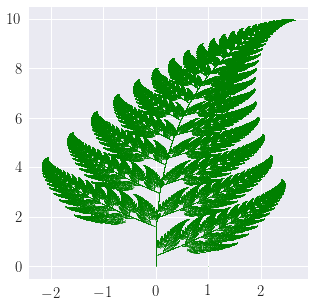

In [98]:
pt_num = int(1e6)
mapping_index = np.random.choice(4, size=pt_num, p=[0.01,0.85,0.07,0.07])
affine_mappings = [
    lambda x, y: (0, 0.16*y),
    lambda x, y: (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6),
    lambda x, y: (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6),
    lambda x, y: (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)
]
points = np.zeros((2, pt_num+1))
for i, mi in enumerate(mapping_index, 1):
    points[:, i] = affine_mappings[mi](*points[:, i-1])
pts = generate_fern()
plt.figure(figsize=(5,5))
plt.scatter(*pts, color='green', s=0.1)

### Refactoring to use functions

In [104]:
Barnsley_fern_params = [
    {'A': [[ 0   ,  0   ], [ 0   , 0.16]], 'b': [0, 0   ], 'p': 0.01}, # Stem
    {'A': [[ 0.85,  0.04], [-0.04, 0.85]], 'b': [0, 1.6 ], 'p': 0.85}, # Successively smaller leaflets
    {'A': [[ 0.2 , -0.26], [ 0.23, 0.22]], 'b': [0, 1.6 ], 'p': 0.07}, # Largest left-hand leaflet
    {'A': [[-0.15,  0.28], [ 0.26, 0.24]], 'b': [0, 0.44], 'p': 0.07}  # Largest right-hand leaflet
]

def plot_fern(pt_num=int(1e6), params=Barnsley_fern_params, figsize=(5,5)):
    # Convert paramters into np.ndarray
    params = [{k: np.array(v) for k, v in ele.items()} for ele in params]
    # Randomly sample affine transformation index
    mapping_index = np.random.choice(4, size=pt_num, p=[item['p'] for item in params])
    affine_mapping = lambda mi, pt: params[mi]['A'] @ pt + params[mi]['b']
    points = np.zeros((2, pt_num+1))
    points[:, 0] = np.array([1, 0])
    for i, mi in enumerate(mapping_index, 1):
        points[:, i] = affine_mapping(mi, points[:, i-1])    
    plt.figure(figsize=figsize)
    plt.scatter(*points, color='green', s=0.1)

Run the routine with default parameters

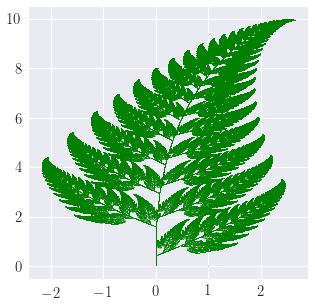

In [105]:
plot_fern()

Once the function is defined, rerun the same routine with different parameters is easy and clean

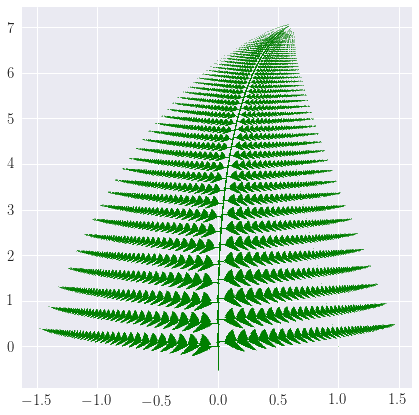

In [102]:
Cyclosorus_fern_params = [
    {'A': [[ 0    ,  0    ], [ 0    , 0.25]], 'b': [ 0    ,-0.4 ], 'p': 0.02},
    {'A': [[ 0.95 ,  0.005], [-0.005, 0.93]], 'b': [-0.002, 0.5 ], 'p': 0.84},
    {'A': [[ 0.036, -0.2  ], [ 0.16 , 0.04]], 'b': [-0.09 , 0.02], 'p': 0.07},
    {'A': [[-0.04 ,  0.2  ], [ 0.16 , 0.04]], 'b': [ 0.083, 0.12], 'p': 0.07}
]
pts = plot_fern(params=Cyclosorus_fern_params, figsize=(7,7))

## Lambda Functions

Lambda functions are inline anonymous functions, it is useful when you have simple task can be written within one line and want to write compact code

Get all palindrome words from the list

In [19]:
words = ['aaa', 'aab', 'aba', 'bbc', 'cad', 'bad', 'ddaa', 'adda']
is_palindrome = lambda x: x == x[::-1]
[w for w in words if is_palindrome(w)], list(filter(is_palindrome, words))

(['aaa', 'aba', 'adda'], ['aaa', 'aba', 'adda'])

Count the number of occurrence that to adjacent letters in word are also adjacent in alphabetic order

In [26]:
count_adjacent = lambda x: len([i for i in range(1, len(x)) if abs(ord(x[i])-ord(x[i-1])) == 1])
{w:count_adjacent(w) for w in words}, dict(map(lambda x:(x, count_adjacent(x)), words))

({'aaa': 0,
  'aab': 1,
  'aba': 2,
  'adda': 0,
  'bad': 1,
  'bbc': 1,
  'cad': 0,
  'ddaa': 0},
 {'aaa': 0,
  'aab': 1,
  'aba': 2,
  'adda': 0,
  'bad': 1,
  'bbc': 1,
  'cad': 0,
  'ddaa': 0})

## Recursive Functions

Recursive functions are allowed in Python, but just be careful about the base case

In [18]:
def combinations(S, k):
    if len(S) < k: return []
    if k == 1: return [[x] for x in S]
    return [[S[i]] + l 
            for i in range(len(S)) 
            for l in combinations(S[i+1:], k-1)]
combinations([1,2,3,4,5], 3)

[[1, 2, 3],
 [1, 2, 4],
 [1, 2, 5],
 [1, 3, 4],
 [1, 3, 5],
 [1, 4, 5],
 [2, 3, 4],
 [2, 3, 5],
 [2, 4, 5],
 [3, 4, 5]]

Use `itertools` to list combinations

In [2]:
import itertools as it
list(it.combinations([1,2,3,4,5], 3))

[(1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

Evolution of function $f(x)$, let $ x_{t+1} = f(x_t) = f(f(x_{t-1})) = \cdots = $ composite $f$ $(t+1)$ times on $x_0$.

Or for short we write $ x_{t} \triangleq f^{(t)}(x_0) $, is there a good way to implement $f^{(n)}$?

Take logistic map in chaos theory for example we have evolution equation $ f(x; r) = r x (1-x) $ and iteration $ x_{t+1} = f(x_t; r) $ with fixed $r$

In [59]:
f = lambda x, r: r * x * (1-x)
# Implement f^(t) with loop
def ft_loop(x, r, t):
    for i in range(t): x = f(x, r)
    return x
# Implement f^(t) with recursion and lambda function
ft_recursive = lambda x, r, t: x if t == 0 else f(ft_recursive(x, r, t-1), r)

x0, r, T = 0.2, 3.5, 1000
ft_loop(x0, r, T), ft_recursive(x0, r, T) 

(0.8269407065914387, 0.8269407065914387)

## Partial Functions

Consider the soft-max function of a vector $ \mathbf{z} $ under scaling $\beta$:
$$
    {[\mathsf{softmax}(\mathbf{z}; \beta)]}_i = \frac{ e^{ \beta z_i } }{ \sum_{j=1}^N e^{ \beta z_j } }
$$

In [52]:
def soft_max(z, beta):
    temp = np.exp(beta*z)
    return temp / temp.sum()
z = np.random.randint(low=0, high=100, size=5)
z, soft_max(z, 0), soft_max(z, 1)

(array([87, 98, 91, 79, 40]),
 array([0.2, 0.2, 0.2, 0.2, 0.2]),
 array([1.66862062e-05, 9.99072272e-01, 9.11035987e-04, 5.59759857e-09,
        6.46423231e-26]))

What if we want to fix $\beta$ and do not write it explicitly in later use?
* give `beta` a default value, e.g. `def soft_max(z, beta=1):`, if modify the original function is allowed.
* use `functools.partial`, general solution

In [55]:
import functools
soft_max_0 = functools.partial(soft_max, beta=0)
soft_max_1 = functools.partial(soft_max, beta=1)
soft_max_0(z), soft_max_1(z)

(array([0.2, 0.2, 0.2, 0.2, 0.2]),
 array([1.66862062e-05, 9.99072272e-01, 9.11035987e-04, 5.59759857e-09,
        6.46423231e-26]))

## Generator expressions

Generator expressions return a potentially infinite stream, but one at a time thus sparing memory. They are ubiquitous in Python 3, allowing us to handle arbitrarily large data sets. 

In [41]:
gen = (i**2 for i in range(10,15))
gen, list(gen)

(<generator object <genexpr> at 0x1a12177b48>, [100, 121, 144, 169, 196])

Generator can be also used as a tool to convert `while` loop into `for` loop when the stopping criterion is unknown beforehand.

For example, here is a generator return the sequence of numbers not containing factor 2, 3, or 5, when the `UB` and `max_len` are infinity, this is a infinitely long sequence

In [43]:
def seq235(start=0, upper=float('inf'), max_len=float('inf')):
    count, i = 0, start
    while i < upper and count < max_len:
        if all( i % x > 0 for x in [2,3,5]):
            count += 1
            yield i
        i += 1

In [44]:
c = seq235()
next(c), next(c), next(c), next(c), next(c), next(c), next(c)

(1, 7, 11, 13, 17, 19, 23)

List the first 30 numbers in `seq235`

In [45]:
print(list(seq235(max_len=30)))

[1, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 49, 53, 59, 61, 67, 71, 73, 77, 79, 83, 89, 91, 97, 101, 103, 107, 109]


List the all numbers in `seq235` that are in interval $ [50, 150) $

In [46]:
print(list(seq235(start=50, upper=150)))

[53, 59, 61, 67, 71, 73, 77, 79, 83, 89, 91, 97, 101, 103, 107, 109, 113, 119, 121, 127, 131, 133, 137, 139, 143, 149]
